## Inicialização

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import os

from sklearn.model_selection import (
    cross_val_score,
    KFold,
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV
)
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (
    mean_squared_error,
    r2_score
)
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import (
    LinearRegression,
    Lasso,
    Ridge
)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [2]:
project_root = "/home/rafaellouvain/hardware-predictor"
os.chdir(project_root)
dataset = pd.read_csv("data/raw/Moto_HW_DATA_hashed.csv")
dataset.head()

,barcode_hashed,age_days,full_cap_min,pct_lvl_max,min_dchrg_fcc,dchrg_diff,EBL,total_chrg_cnt,cnt_USB_chrg,shtdn_total,...,ratio_4G_ratio,ratio_5G_ratio,wifi_hrs_ratio,wifi_connections_ratio,mobile_rx_MB_ratio,mobile_tx_MB_ratio,son_hrs_ratio,primary_mem_free_MB_ratio,bt_conns_ratio,CRASH_total_ratio
0,b926676dccc67406700c4c57cf055b3df237fc0ab286f6...,1516,3644678.5,94.75,0.0,125.25,14.5,3.0,0.00,0.75,...,0.9969,0.0,0.9118,1.000,1.9149,1.2500,0.8889,0.7617,0.1111,1.5357
1,7a2e95793e69ff2704030353bf27fc1ad13916d0370a25...,309,4744.0,96.75,5000.0,74.25,17.5,4.0,0.00,0.00,...,1.0135,0.0,0.9574,2.625,7.6545,13.6667,1.0000,1.2185,0.5000,1.0000
2,938897a9982050704df677787e41581a8cc9335d19b735...,1186,-1.0,60.00,5000.0,14.00,207.0,1.5,0.00,0.00,...,0.0000,0.0,0.4357,0.750,0.0000,0.0000,0.0000,9.8087,0.0000,1.0000
3,6e878b24ff6ff1f6ffe4dc86f6095608800e1fce9a9c4b...,135,-1.0,90.75,-1.0,54.00,39.5,1.5,0.25,0.50,...,1.0509,0.0,1.0000,0.000,0.0000,0.0000,1.0000,1.0732,0.0000,1.3333
4,37219dd65adebf813d20af03c21bb6f1aa5b72815d964a...,640,-1.0,97.00,5000.0,32.00,62.0,2.0,0.00,1.00,...,0.0000,0.0,1.0000,0.000,0.0000,0.0000,1.0000,1.0000,0.0000,1.0000


## Pré-Processamento e Limpeza

In [174]:
dataset.iloc[67] # linha 69

barcode_hashed               86aa501e852a9a21429861baef08566508300caebe9450...
age_days                                                                   115
full_cap_min                                                              -1.0
pct_lvl_max                                                          95.333333
min_dchrg_fcc                                                             -1.0
dchrg_diff                                                           60.333333
EBL                                                                       35.0
total_chrg_cnt                                                             2.0
cnt_USB_chrg                                                               0.0
shtdn_total                                                                0.0
btlow_total                                                                1.0
call_drop_sum                                                              0.0
call_tot_mins                                       

In [ ]:
mask = dataset["pct_lvl_max"].apply(lambda x: isinstance(x, str))
dataset[mask]


,barcode_hashed,age_days,full_cap_min,pct_lvl_max,min_dchrg_fcc,dchrg_diff,EBL,total_chrg_cnt,cnt_USB_chrg,shtdn_total,...,ratio_4G_ratio,ratio_5G_ratio,wifi_hrs_ratio,wifi_connections_ratio,mobile_rx_MB_ratio,mobile_tx_MB_ratio,son_hrs_ratio,primary_mem_free_MB_ratio,bt_conns_ratio,CRASH_total_ratio


In [ ]:
filter = (dataset["pct_lvl_max"] > 100) | (dataset["pct_lvl_max"] < 10)
resultado = dataset[filter]
resultado.head()
dataset = dataset[~filter]

In [81]:
for col in sorted(dataset.columns):
    print(col)


CRASH_total
CRASH_total_ratio
EBL
EBL_ratio
age_days
barcode_hashed
bt_conns
bt_conns_ratio
btlow_total
btlow_total_ratio
call_drop_sum
call_drop_sum_ratio
call_tot_mins
call_tot_mins_ratio
calls_tot
calls_tot_ratio
cnt_USB_chrg
cnt_USB_chrg_ratio
dchrg_diff
dchrg_diff_ratio
full_cap_min
full_cap_min_ratio
min_dchrg_fcc
min_dchrg_fcc_ratio
mobile_rx_MB
mobile_rx_MB_ratio
mobile_tx_MB
mobile_tx_MB_ratio
msgs_tot
msgs_tot_ratio
pct_lvl_max
pct_lvl_max_ratio
pics_tot
pics_tot_ratio
primary_mem_free_MB
primary_mem_free_MB_ratio
ratio_3G
ratio_3G_ratio
ratio_4G
ratio_4G_ratio
ratio_5G
ratio_5G_ratio
shtdn_total
shtdn_total_ratio
son_hrs
son_hrs_ratio
sst_poor_time_ratio
sst_poor_time_ratio_ratio
total_chrg_cnt
total_chrg_cnt_ratio
wifi_connections
wifi_connections_ratio
wifi_hrs
wifi_hrs_ratio


In [5]:
keep_columns = [
    "pct_lvl_max",
    "son_hrs",
    "son_hrs_ratio",
    "shtdn_total",
    "min_dchrg_fcc_ratio",
    "primary_mem_free_MB",
    "primary_mem_free_MB_ratio",
    "cnt_USB_chrg",
    "cnt_USB_chrg_ratio",
    "age_days",
    "dchrg_diff",               
    "dchrg_diff_ratio",         
    "full_cap_min",
    "full_cap_min_ratio",
    "btlow_total",
    "btlow_total_ratio"
]
dataset = dataset[keep_columns]
dataset.head()


,pct_lvl_max,son_hrs,son_hrs_ratio,shtdn_total,min_dchrg_fcc_ratio,primary_mem_free_MB,primary_mem_free_MB_ratio,cnt_USB_chrg,cnt_USB_chrg_ratio,age_days,dchrg_diff,dchrg_diff_ratio,full_cap_min,full_cap_min_ratio,btlow_total,btlow_total_ratio
0,94.75,4.25,0.8889,0.75,0.0,4542.00,0.7617,0.00,0.0,1516,125.25,0.9881,3644678.5,1.2203,1.25,1.50
1,96.75,6.50,1.0000,0.00,1.0,54590.75,1.2185,0.00,0.0,309,74.25,1.0204,4744.0,1.0219,2.75,1.75
2,60.00,0.25,0.0000,0.00,1.0,621.50,9.8087,0.00,0.0,1186,14.00,1.5455,-1.0,1.0000,0.75,0.50
3,90.75,4.50,1.0000,0.50,1.0,75106.75,1.0732,0.25,0.0,135,54.00,1.0571,-1.0,1.0000,1.50,1.00
4,97.00,2.00,1.0000,1.00,1.0,3864.00,1.0000,0.00,0.0,640,32.00,1.0000,-1.0,1.0000,0.00,0.00


In [6]:
missing_rows = dataset[dataset.isnull().any(axis=1)]
missing_rows

,pct_lvl_max,son_hrs,son_hrs_ratio,shtdn_total,min_dchrg_fcc_ratio,primary_mem_free_MB,primary_mem_free_MB_ratio,cnt_USB_chrg,cnt_USB_chrg_ratio,age_days,dchrg_diff,dchrg_diff_ratio,full_cap_min,full_cap_min_ratio,btlow_total,btlow_total_ratio
2002,86.0,0.00,0.0,0.0,1.0,NaN,0.0,0.0,0.0,1238,29.00,1.0000,-1.000000,1.0000,0.0,0.0
2977,71.0,1.00,1.0,0.0,1.0,NaN,0.0,0.0,0.0,2028,24.00,1.2727,3486.666667,1.0738,1.0,1.0
4253,80.0,0.00,0.0,1.0,1.0,NaN,0.0,3.0,1.0,1898,20.00,1.0000,3574.000000,1.0000,1.0,1.0
6777,86.0,7.00,1.0,1.0,1.0,NaN,0.0,60.0,1.0,1448,126.00,1.0000,4099.000000,1.0000,36.0,1.0
8137,99.0,4.00,1.0,0.0,1.0,NaN,0.0,1.0,1.0,1665,149.00,1.0000,2111.000000,1.0000,3.0,1.0
8422,82.0,2.00,1.0,1.0,1.0,NaN,0.0,4.0,1.0,1570,106.00,1.0000,3140.000000,1.0000,4.0,1.0
8448,97.0,6.00,1.0,1.0,1.0,NaN,0.0,0.0,0.0,2111,180.00,0.9890,3600.750000,1.0021,2.0,1.0
13420,77.5,0.25,0.0,0.0,1.0,NaN,0.0,0.0,0.0,2001,48.75,1.5000,3740.750000,0.8252,1.0,1.0
14197,96.0,9.00,1.0,0.0,1.0,NaN,0.0,1.0,1.0,1904,63.00,1.0000,2775.000000,1.0000,2.0,1.0


In [7]:
print("Total de valores nulos:", dataset.isnull().sum().sum())

Total de valores nulos: 9


In [8]:
dataset = dataset.dropna()


## Análise de variáveis relevantes com Regressão Lasso

In [9]:
X = dataset.drop("pct_lvl_max", axis=1).values
y = dataset["pct_lvl_max"].values

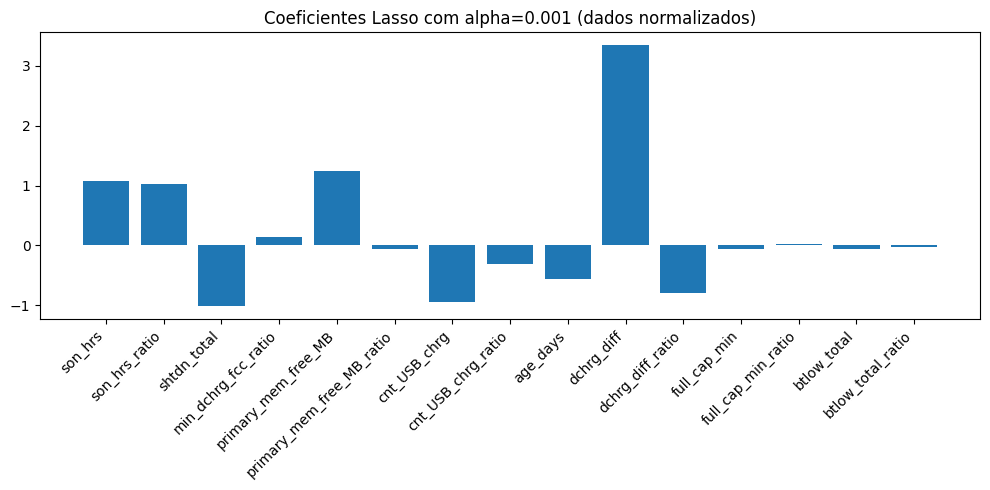

In [10]:
names = dataset.drop("pct_lvl_max", axis=1).columns

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lasso = Lasso(alpha=0.001)
lasso_coef = lasso.fit(X_scaled, y).coef_

# Visualização
plt.figure(figsize=(10, 5))
plt.bar(names, lasso_coef)
plt.xticks(rotation=45, ha="right")
plt.title("Coeficientes Lasso com alpha=0.001 (dados normalizados)")
plt.tight_layout()
plt.show()

In [ ]:
limiar = 0.1

importancia = pd.DataFrame({
    "feature": names,
    "coef": lasso_coef
})

# Filtra por coeficientes com módulo acima do limiar
importantes = importancia[np.abs(importancia["coef"]) > limiar]

ssimportantes = importantes.sort_values(by="coef", key=np.abs, ascending=False)

print(importantes)

                feature      coef
9            dchrg_diff  3.342664
4   primary_mem_free_MB  1.240699
0               son_hrs  1.068605
1         son_hrs_ratio  1.017538
2           shtdn_total -1.016895
6          cnt_USB_chrg -0.954104
10     dchrg_diff_ratio -0.789498
8              age_days -0.556557
7    cnt_USB_chrg_ratio -0.317314
3   min_dchrg_fcc_ratio  0.140531


#### Portanto, apenas as seguintes variáveis serão utilizadas como features:

* son_hrs
* son_hrs_ratio
* dchrg_diff_ratio
* shtdn_total
* dchrg_diff

In [12]:
final_columns = [
    "pct_lvl_max",
    "son_hrs",
    "son_hrs_ratio",
    "dchrg_diff_ratio",         
    "shtdn_total",
    "dchrg_diff",
]
df = dataset[final_columns]
df.head()


,pct_lvl_max,son_hrs,son_hrs_ratio,dchrg_diff_ratio,shtdn_total,dchrg_diff
0,94.75,4.25,0.8889,0.9881,0.75,125.25
1,96.75,6.50,1.0000,1.0204,0.00,74.25
2,60.00,0.25,0.0000,1.5455,0.00,14.00
3,90.75,4.50,1.0000,1.0571,0.50,54.00
4,97.00,2.00,1.0000,1.0000,1.00,32.00


## Análise Final de Pré-Processamento com as Features escolhidas

##### son_hrs

In [ ]:
df["son_hrs"].describe()

count    21051.000000
mean         5.206993
std          2.768471
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         21.000000
Name: son_hrs, dtype: float64

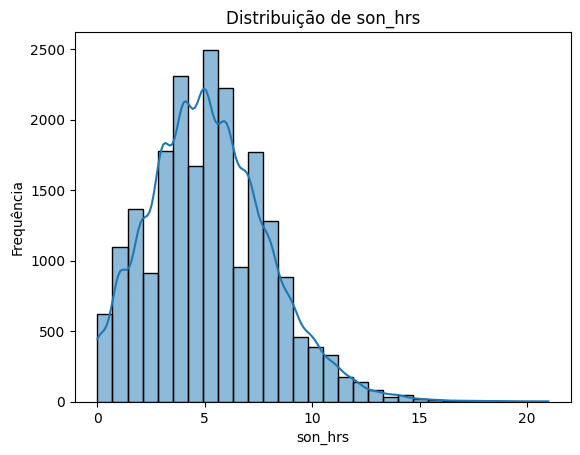

In [197]:
sns.histplot(dataset["son_hrs"], bins=30, kde=True)
plt.title("Distribuição de son_hrs")
plt.xlabel("son_hrs")
plt.ylabel("Frequência")
plt.show()

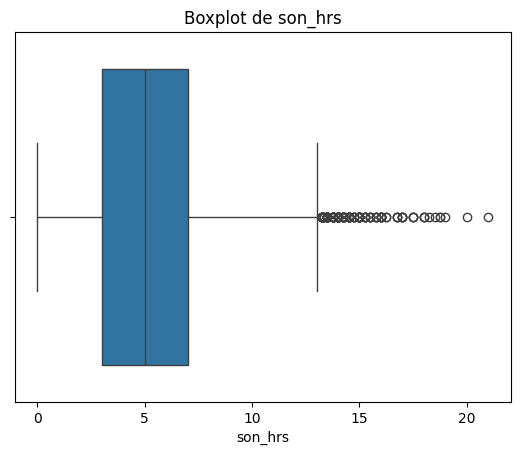

In [146]:
sns.boxplot(x=dataset["son_hrs"])
plt.title("Boxplot de son_hrs")
plt.show()


In [ ]:
z_scores = zscore(dataset["son_hrs"])
outliers_z = dataset[np.abs(z_scores) > 3]

print(f"Número de outliers pelo z-score: {len(outliers_z)}")


Número de outliers pelo z-score: 118


son_hrs_ratio

In [150]:
df["son_hrs_ratio"].describe()

count    21051.000000
mean         0.986084
std          0.491099
min          0.000000
25%          0.909100
50%          1.000000
75%          1.076900
max         18.000000
Name: son_hrs_ratio, dtype: float64

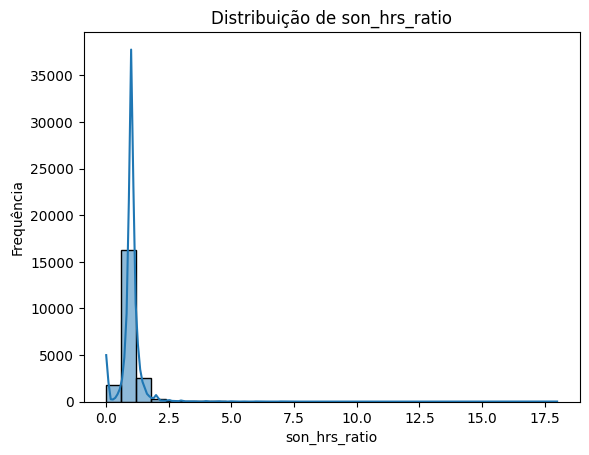

In [ ]:
sns.histplot(df["son_hrs_ratio"], bins=30, kde=True)
plt.title("Distribuição de son_hrs_ratio")
plt.xlabel("son_hrs_ratio")
plt.ylabel("Frequência")
plt.show()

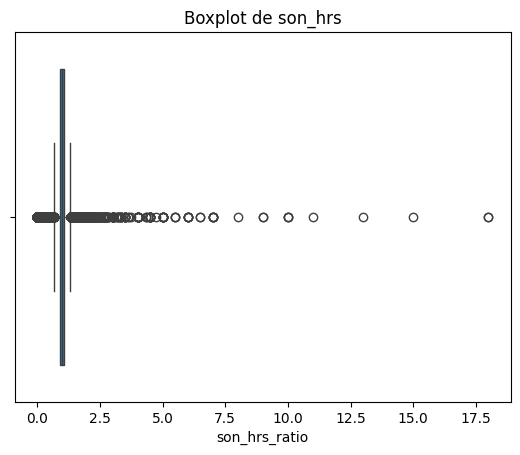

In [ ]:
sns.boxplot(x=df["son_hrs_ratio"])
plt.title("Boxplot de son_hrs_ratio")
plt.show()

In [ ]:
z_scores = zscore(df["son_hrs_ratio"])
outliers_z = df[np.abs(z_scores) > 3]

print(f"Número de outliers pelo z-score: {len(outliers_z)}")

Número de outliers pelo z-score: 184


##### dchrg_diff_ratio

In [ ]:
df["dchrg_diff_ratio"].describe()

count    21051.000000
mean         0.990942
std          0.356684
min          0.000000
25%          0.923700
50%          1.000000
75%          1.055200
max         11.500000
Name: dchrg_diff_ratio, dtype: float64

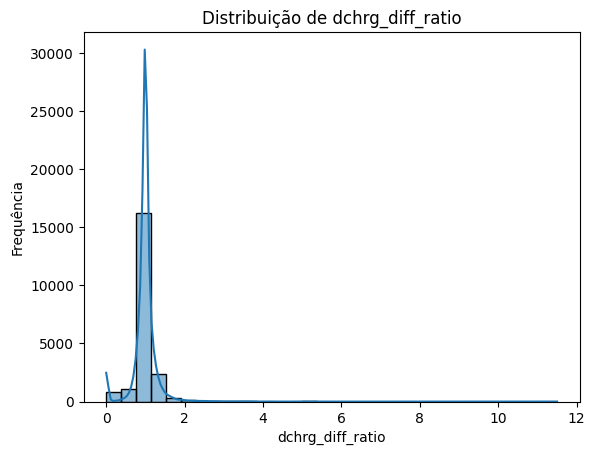

In [155]:
sns.histplot(df["dchrg_diff_ratio"], bins=30, kde=True)
plt.title("Distribuição de dchrg_diff_ratio")
plt.xlabel("dchrg_diff_ratio")
plt.ylabel("Frequência")
plt.show()

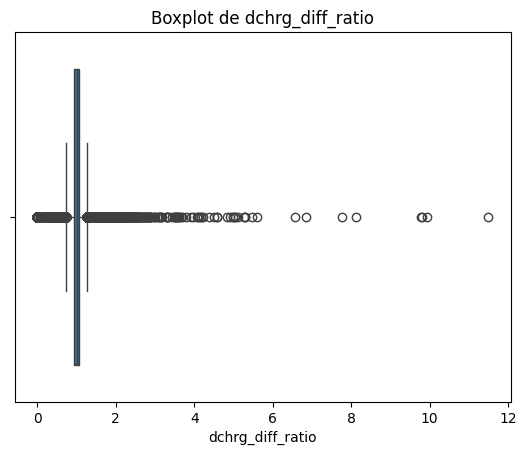

In [156]:
sns.boxplot(x=df["dchrg_diff_ratio"])
plt.title("Boxplot de dchrg_diff_ratio")
plt.show()

In [158]:
z_scores = zscore(df["dchrg_diff_ratio"].dropna())  # evita erro com NaN
outliers_z = df[np.abs(zscore(df["dchrg_diff_ratio"].fillna(0))) > 3]

print(f"Número de outliers pelo z-score (> 3 desvios): {len(outliers_z)}")

Número de outliers pelo z-score (> 3 desvios): 173


##### shtdn_total

In [159]:
df["shtdn_total"].describe()

count    21051.000000
mean         0.558294
std          0.679014
min          0.000000
25%          0.000000
50%          0.500000
75%          1.000000
max         13.000000
Name: shtdn_total, dtype: float64

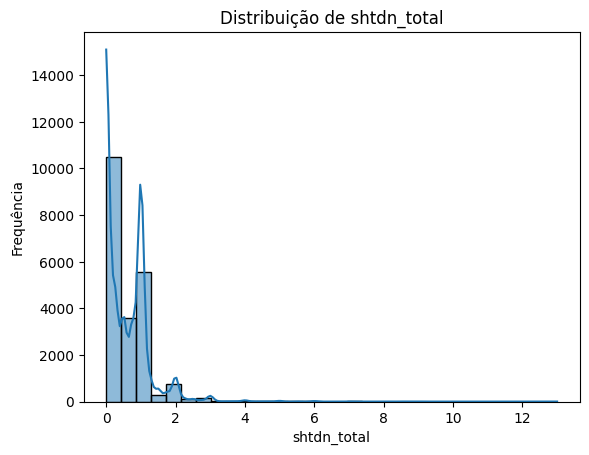

In [160]:
sns.histplot(df["shtdn_total"], bins=30, kde=True)
plt.title("Distribuição de shtdn_total")
plt.xlabel("shtdn_total")
plt.ylabel("Frequência")
plt.show()

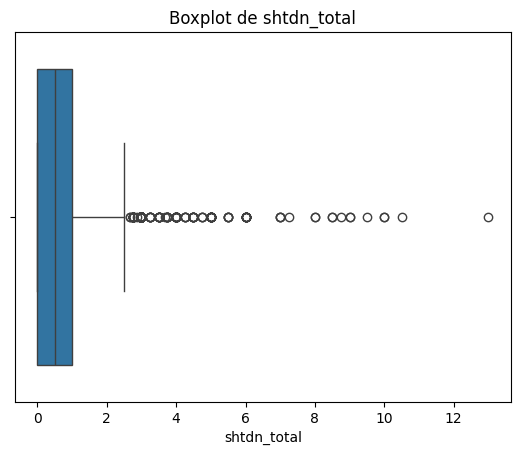

In [161]:
sns.boxplot(x=df["shtdn_total"])
plt.title("Boxplot de shtdn_total")
plt.show()


In [162]:
z_scores = zscore(df["shtdn_total"].dropna()) 
outliers_z = df[np.abs(zscore(df["shtdn_total"].fillna(0))) > 3]

print(f"Número de outliers pelo z-score (> 3 desvios): {len(outliers_z)}")

Número de outliers pelo z-score (> 3 desvios): 275


##### dchrg_diff

In [198]:
df["dchrg_diff"].describe()

count    21051.000000
mean        71.774691
std         37.976761
min          0.000000
25%         45.250000
50%         67.000000
75%         92.000000
max        721.000000
Name: dchrg_diff, dtype: float64

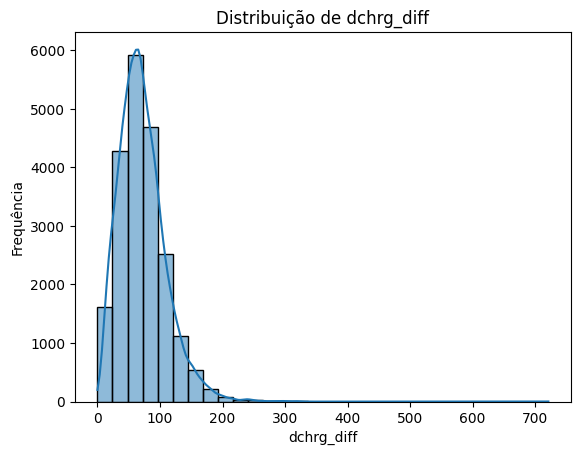

In [199]:
sns.histplot(df["dchrg_diff"], bins=30, kde=True)
plt.title("Distribuição de dchrg_diff")
plt.xlabel("dchrg_diff")
plt.ylabel("Frequência")
plt.show()

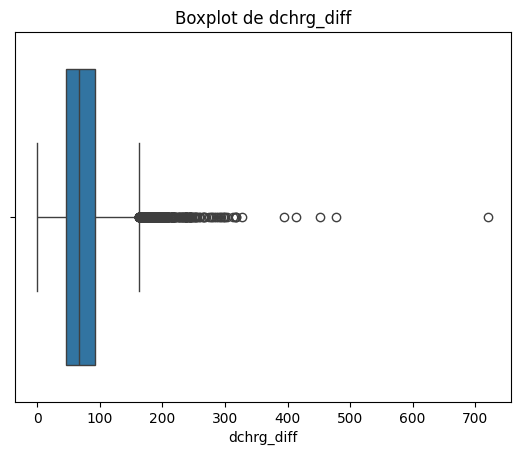

In [200]:
sns.boxplot(x=df["dchrg_diff"])
plt.title("Boxplot de dchrg_diff")
plt.show()


In [202]:

z_scores = zscore(df["dchrg_diff"].dropna())
outliers_z = df[np.abs(zscore(df["dchrg_diff"].fillna(0))) > 3]

print(f"Número de outliers pelo z-score (> 3 desvios): {len(outliers_z)}")

Número de outliers pelo z-score (> 3 desvios): 203


In [225]:
df[df["dchrg_diff"] < 0]

,son_hrs,son_hrs_ratio,dchrg_diff_ratio,shtdn_total,dchrg_diff


In [226]:
df[df["dchrg_diff"] > 100]

,son_hrs,son_hrs_ratio,dchrg_diff_ratio,shtdn_total,dchrg_diff
0,4.25,0.8889,0.9881,0.75,125.25
13,9.75,1.0526,1.0149,1.25,101.75
22,8.00,1.0000,1.0000,0.00,128.00
40,6.75,1.0769,0.8711,0.00,134.25
43,3.75,2.0000,2.3195,1.00,140.25
...,...,...,...,...,...
21049,9.25,1.0556,1.0182,1.00,111.00
21052,12.00,1.1818,0.8374,0.25,132.75
21056,14.00,1.0000,1.0000,1.00,155.00
21057,7.00,1.0000,1.0000,8.00,107.00


In [13]:
df = df[df["dchrg_diff"] <= 100]

## Escolha do melhor modelo com Grid Search e Randomize Search

In [14]:
X = df.drop(columns=["pct_lvl_max"])
y = df["pct_lvl_max"]

In [ ]:
from scipy.stats import randint, uniform
from sklearn.ensemble import GradientBoostingRegressor


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

kf = KFold(n_splits=5, shuffle=True, random_state=42)

n_iteracoes = 25

models_and_params = {
    'LinearRegression': {
        'pipeline': Pipeline([
            ('scaler', scaler),
            ('model', LinearRegression())
        ]),
        'params': {}
    },
    'DecisionTreeRegressor': {
        'pipeline': Pipeline([
            ('scaler', scaler),
            ('model', DecisionTreeRegressor(random_state=42))
        ]),
        'params': {
            'model__max_depth': [None, 5, 10, 15],
            'model__min_samples_split': [2, 5, 10]
        }
    },
    'RandomForestRegressor': {
        'pipeline': Pipeline([
            ('scaler', scaler),
            ('model', RandomForestRegressor(random_state=42))
        ]),
        'params': {
            'model__n_estimators': [50, 100, 200],
            'model__max_depth': [10, 20, None],
            'model__min_samples_split': [2, 5]
        }
    },
    'GradientBoostingRegressor': {
        'pipeline': Pipeline([
            ('scaler', scaler),
            ('model', GradientBoostingRegressor(random_state=42))
        ]),
        'params': {
            'model__n_estimators': [100, 200, 300],
            'model__learning_rate': [0.01, 0.05, 0.1],
            'model__max_depth': [3, 4, 5]
        }
    },
    'SVR': {
        'pipeline': Pipeline([
            ('scaler', scaler),
            ('model', SVR())
        ]),
        'params': {
            'model__kernel': ['rbf'],
            'model__C': [0.1, 1, 10],
            'model__gamma': ['scale', 'auto']
        }
    },
    'KNeighborsRegressor': {
        'pipeline': Pipeline([
            ('scaler', scaler),
            ('model', KNeighborsRegressor())
        ]),
        'params': {
            'model__n_neighbors': [3, 5, 7, 9],
            'model__weights': ['uniform', 'distance'],
            'model__p': [1, 2]
        }
    }
}

best_overall_model = None
best_overall_score = -np.inf

model = []
params = []
rmse_ = []

print("--- Iniciando Busca de Hiperparâmetros ---")

for model_name, config in models_and_params.items():
    print(f"\n--- Executando busca para: {model_name} ---")

    if config['params'] == {}:
        search = GridSearchCV(
            estimator=config['pipeline'],
            param_grid={},
            cv=kf,
            scoring='neg_mean_squared_error',
            verbose=1,
            n_jobs=-1
        )
    else:
        search = RandomizedSearchCV(
            estimator=config['pipeline'],
            param_distributions=config['params'],
            n_iter=n_iteracoes,
            cv=kf,
            scoring='neg_mean_squared_error',
            random_state=42,
            verbose=1,
            n_jobs=-1
        )

    search.fit(X_train, y_train)
    current_model_score = search.best_score_

    print(f"Melhores parâmetros para {model_name}: {search.best_params_}")
    print(f"Melhor MSE (negativo) em CV para {model_name}: {current_model_score:.4f}")
    print(f"Melhor RMSE em CV para {model_name}: {np.sqrt(-current_model_score):.4f}")

    model.append(model_name)
    params.append(search.best_params_)
    rmse_.append(np.sqrt(-current_model_score))

    if current_model_score > best_overall_score:
        best_overall_score = current_model_score
        best_overall_model = {
            'name': model_name,
            'pipeline': search.best_estimator_,
            'params': search.best_params_,
            'cv_score': current_model_score
        }

    y_pred = search.predict(X_test)
    mse_test = mean_squared_error(y_test, y_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_pred)

    print(f">>> Avaliação no conjunto de teste:")
    print(f"R²: {r2_test:.4f}")
    print(f"MSE: {mse_test:.4f}")
    print(f"RMSE: {rmse_test:.4f}")

print("\n" + "=" * 60)
print("--- Busca Finalizada ---")
print("=" * 60)
print(f"O melhor modelo global encontrado em Validação Cruzada é: {best_overall_model['name']}")
print(f"Com o score (Negative MSE): {best_overall_model['cv_score']:.4f}")
print(f"E os parâmetros: {best_overall_model['params']}")
print("-" * 60)

--- Iniciando Busca de Hiperparâmetros ---

--- Executando busca para: LinearRegression ---
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Melhores parâmetros para LinearRegression: {}
Melhor MSE (negativo) em CV para LinearRegression: -90.4992
Melhor RMSE em CV para LinearRegression: 9.5131
>>> Avaliação no conjunto de teste:
R²: 0.1588
MSE: 83.9757
RMSE: 9.1638

--- Executando busca para: DecisionTreeRegressor ---
Fitting 5 folds for each of 12 candidates, totalling 60 fits


/home/rafaellouvain/hardware-predictor/.venv/lib/python3.11/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 12 is smaller than n_iter=25. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Melhores parâmetros para DecisionTreeRegressor: {'model__min_samples_split': 10, 'model__max_depth': 5}
Melhor MSE (negativo) em CV para DecisionTreeRegressor: -81.7433
Melhor RMSE em CV para DecisionTreeRegressor: 9.0412
>>> Avaliação no conjunto de teste:
R²: 0.2470
MSE: 75.1709
RMSE: 8.6701

--- Executando busca para: RandomForestRegressor ---
Fitting 5 folds for each of 18 candidates, totalling 90 fits


/home/rafaellouvain/hardware-predictor/.venv/lib/python3.11/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 18 is smaller than n_iter=25. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Melhores parâmetros para RandomForestRegressor: {'model__n_estimators': 200, 'model__min_samples_split': 5, 'model__max_depth': 10}
Melhor MSE (negativo) em CV para RandomForestRegressor: -78.5374
Melhor RMSE em CV para RandomForestRegressor: 8.8621
>>> Avaliação no conjunto de teste:
R²: 0.2715
MSE: 72.7270
RMSE: 8.5280

--- Executando busca para: GradientBoostingRegressor ---
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Melhores parâmetros para GradientBoostingRegressor: {'model__n_estimators': 100, 'model__max_depth': 4, 'model__learning_rate': 0.05}
Melhor MSE (negativo) em CV para GradientBoostingRegressor: -77.1787
Melhor RMSE em CV para GradientBoostingRegressor: 8.7851
>>> Avaliação no conjunto de teste:
R²: 0.2839
MSE: 71.4924
RMSE: 8.4553

--- Executando busca para: SVR ---
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/home/rafaellouvain/hardware-predictor/.venv/lib/python3.11/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=25. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Melhores parâmetros para SVR: {'model__kernel': 'rbf', 'model__gamma': 'scale', 'model__C': 10}
Melhor MSE (negativo) em CV para SVR: -84.4867
Melhor RMSE em CV para SVR: 9.1917
>>> Avaliação no conjunto de teste:
R²: 0.2354
MSE: 76.3304
RMSE: 8.7367

--- Executando busca para: KNeighborsRegressor ---
Fitting 5 folds for each of 16 candidates, totalling 80 fits


/home/rafaellouvain/hardware-predictor/.venv/lib/python3.11/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 16 is smaller than n_iter=25. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Melhores parâmetros para KNeighborsRegressor: {'model__weights': 'uniform', 'model__p': 2, 'model__n_neighbors': 9}
Melhor MSE (negativo) em CV para KNeighborsRegressor: -85.0677
Melhor RMSE em CV para KNeighborsRegressor: 9.2232
>>> Avaliação no conjunto de teste:
R²: 0.1979
MSE: 80.0737
RMSE: 8.9484

--- Busca Finalizada ---
O melhor modelo global encontrado em Validação Cruzada é: GradientBoostingRegressor
Com o score (Negative MSE): -77.1787
E os parâmetros: {'model__n_estimators': 100, 'model__max_depth': 4, 'model__learning_rate': 0.05}
------------------------------------------------------------


In [ ]:

X_train_gb, X_test_gb, y_train_gb, y_test_gb = train_test_split(X, y, test_size=0.2, random_state=123)

scaler = StandardScaler()

pipeline_gb = Pipeline([
    ('scaler', scaler),
    ('model', GradientBoostingRegressor(random_state=42))
])

param_distributions = {
    'model__n_estimators': randint(100, 400),          # número de árvores
    'model__learning_rate': uniform(0.01, 0.15),       # taxa de aprendizado
    'model__max_depth': randint(3, 6),                 # profundidade da árvore
    'model__min_samples_split': randint(2, 15)         # mínimo para divisão
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

random_search_gb = RandomizedSearchCV(
    estimator=pipeline_gb,
    param_distributions=param_distributions,
    n_iter=200,
    cv=kf,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

random_search_gb.fit(X_train_gb, y_train_gb)

best_params = random_search_gb.best_params_
best_score = random_search_gb.best_score_

print("\nMelhores hiperparâmetros encontrados para Gradient Boosting Regressor:")
for k, v in best_params.items():
    print(f"{k}: {v}")

print(f"\nMelhor MSE (negativo) em validação cruzada: {best_score:.4f}")
print(f"Melhor RMSE em validação cruzada: {np.sqrt(-best_score):.4f}")

y_pred_gb = random_search_gb.predict(X_test_gb)
mse_test = mean_squared_error(y_test_gb, y_pred_gb)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test_gb, y_pred_gb)

print("\n--- Avaliação no conjunto de teste ---")
print(f"R²: {r2_test:.4f}")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")


Fitting 5 folds for each of 200 candidates, totalling 1000 fits

Melhores hiperparâmetros encontrados para Gradient Boosting Regressor:
model__learning_rate: 0.04659844650686254
model__max_depth: 4
model__min_samples_split: 7
model__n_estimators: 150

Melhor MSE (negativo) em validação cruzada: -75.6512
Melhor RMSE em validação cruzada: 8.6978

--- Avaliação no conjunto de teste ---
R²: 0.3099
MSE: 75.6844
RMSE: 8.6997


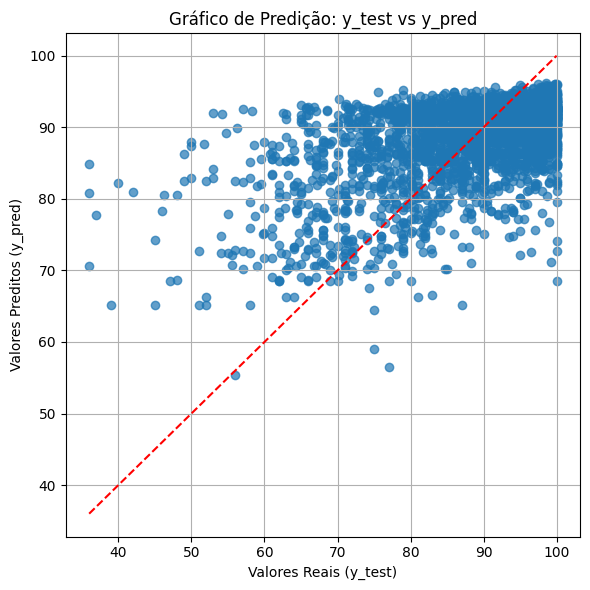

In [ ]:
# Gráfico de y_pred vs y_test
plt.figure(figsize=(6, 6))
plt.scatter(y_test_gb, y_pred_gb, alpha=0.7)
plt.plot([y_test_gb.min(), y_test_gb.max()], [y_test_gb.min(), y_test_gb.max()], 'r--')
plt.xlabel("Valores Reais (y_test)")
plt.ylabel("Valores Preditos (y_pred)")
plt.title("Gráfico de Predição: y_test vs y_pred")
plt.grid(True)
plt.tight_layout()
plt.show()

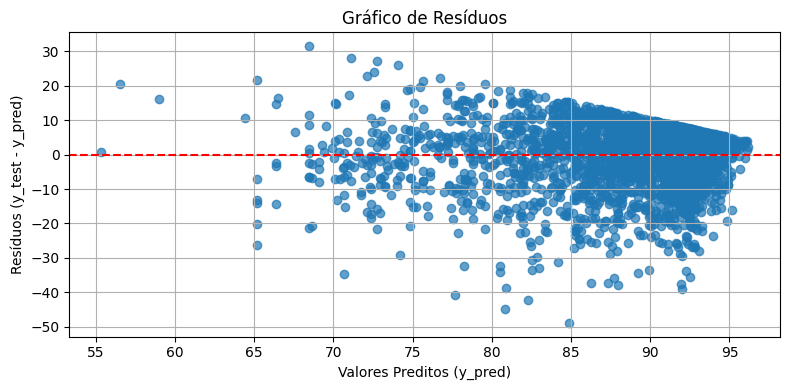

In [ ]:
# Cálculo dos resíduos
residuos = y_test_gb - y_pred_gb

plt.figure(figsize=(8, 4))
plt.scatter(y_pred_gb, residuos, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valores Preditos (y_pred)")
plt.ylabel("Resíduos (y_test - y_pred)")
plt.title("Gráfico de Resíduos")
plt.grid(True)
plt.tight_layout()
plt.show()